## Data manipulation

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'estat_crim_off_cat.tsv', sep='\t')

In [3]:
data = data.rename({data.columns[0]: data.columns[0].replace(r"\TIME_PERIOD", "")}, axis="columns")
split_name_columns = (data.columns[0]).split(',')
count_split_columns = len(split_name_columns)
# assert?

In [4]:
data[split_name_columns] = data[data.columns[0]].str.split(',', expand=True)
data = data.drop(data.columns[0], axis="columns") #odstraneni jiz rozdeleneho sloupce

%run add_info.ipynb
data = data.merge(geo_df, how='left', on='geo')
data = data.merge(iccs_df, how='left', on='iccs')
data = data.drop(columns=['geo', 'iccs'])


In [5]:
# presun rozdelenych a naparovaných udaju  na zacatek df
reorg_columns = data.columns.tolist()
final_reorg_columns = reorg_columns[-count_split_columns:] + reorg_columns[:-count_split_columns]
data = data[final_reorg_columns]

In [6]:
data = data.replace(": ", 'NaN')

column_period = data.columns[count_split_columns:] 
data[column_period] = data[data.columns[count_split_columns:]].astype('float')

In [7]:
no_anual = data[data['freq'] != 'A'].index # podminka, ze se nejedna o rocni data
data.drop(index=no_anual, inplace=True)

no_p_hthab = data[data['unit'] != 'P_HTHAB'].index # podminka, ze se nejedna o udaj na 100tis obyvatel
data.drop(index=no_p_hthab, inplace=True)

In [8]:
years_list = data.columns[count_split_columns:]
info_list = data.columns[:count_split_columns]

In [9]:
unpivot_data = pd.melt(data, id_vars=info_list, value_vars=years_list, var_name='year', value_name='value')
unpivot_data['year'] = unpivot_data['year'].astype('int')
unpivot_data

,freq,unit,country_name,crime_info,year,value
0,A,P_HTHAB,Albania,Intentional homicide,2008,2.78
1,A,P_HTHAB,Austria,Intentional homicide,2008,0.70
2,A,P_HTHAB,Bosnia and Herzegovina,Intentional homicide,2008,1.72
3,A,P_HTHAB,Belgium,Intentional homicide,2008,1.91
4,A,P_HTHAB,Bulgaria,Intentional homicide,2008,2.29
...,...,...,...,...,...,...
11605,A,P_HTHAB,Serbia,Participation in an organized criminal group,2022,NaN
11606,A,P_HTHAB,Slovenia,Participation in an organized criminal group,2022,0.00
11607,A,P_HTHAB,Slovakia,Participation in an organized criminal group,2022,0.15
11608,A,P_HTHAB,Türkiye,Participation in an organized criminal group,2022,NaN


## Data visualisation

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
%run custom_function.ipynb # widgety nelze spoustet ze souboru .py?, pouze z ipynb, dostatz widget hodnoy je pak složitější a delší, než napsatkod přímo? - overit

In [11]:
country_list_sorted = sorted(list(set(unpivot_data['country_name'].tolist())))
crime_list_sorted = sorted(list(set(unpivot_data['crime_info'].tolist())))

In [12]:
country = widgets.Dropdown(
    options=country_list_sorted,
    value=country_list_sorted[0],
    description='Country:',
    disabled=False,
    )
crime = widgets.Dropdown(
    options=crime_list_sorted,
    value=crime_list_sorted[0],
    description='Crime:',
    disabled=False,
    )

In [13]:
display(country)
display(crime)

Dropdown(description='Country:', options=('Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria…

Dropdown(description='Crime:', options=('Acts against computer systems', 'Attempted intentional homicide', 'Br…

In [14]:
filtered_data, filtered_data_min_year, filtered_data_max_year = get_filtered_data(unpivot_data, country.value, crime.value)
get_basic_filtered_info(filtered_data, country.value, crime.value)

'During a 15-year period, Czechia recorded 15 entries for Intentional homicide types of crime. Across these years, there were an average of 0.75 crimes per hundred thousand inhabitants each year. The minimum recorded crime rate per hundred thousand inhabitants was 0.38, while the maximum was 1.09. These two values are not very far from the mean of 0.75.'

In [16]:
filtered_data.describe()
filtered_data['year'].count()
filtered_data['value'].mean()
filtered_data


,freq,unit,country_name,crime_info,year,value
7,A,P_HTHAB,Czechia,Intentional homicide,2008,1.09
781,A,P_HTHAB,Czechia,Intentional homicide,2009,1.01
1555,A,P_HTHAB,Czechia,Intentional homicide,2010,1.00
2329,A,P_HTHAB,Czechia,Intentional homicide,2011,0.79
3103,A,P_HTHAB,Czechia,Intentional homicide,2012,0.90
3877,A,P_HTHAB,Czechia,Intentional homicide,2013,0.86
4651,A,P_HTHAB,Czechia,Intentional homicide,2014,0.77
5425,A,P_HTHAB,Czechia,Intentional homicide,2015,0.84
6199,A,P_HTHAB,Czechia,Intentional homicide,2016,0.62
6973,A,P_HTHAB,Czechia,Intentional homicide,2017,0.38


In [17]:
# TODO: propojit widgetu s grafem, aby byl rovnou interaktivní, pozor na dublo, trublo grafů

In [18]:
years_range = widgets.IntRangeSlider(
    value=[filtered_data_min_year, filtered_data_max_year],
    min=filtered_data_min_year,
    max=filtered_data_max_year,
    step=1,
    description='Years:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,   
    readout_format='d',

)
years_range

IntRangeSlider(value=(2008, 2022), continuous_update=False, description='Years:', max=2022, min=2008)

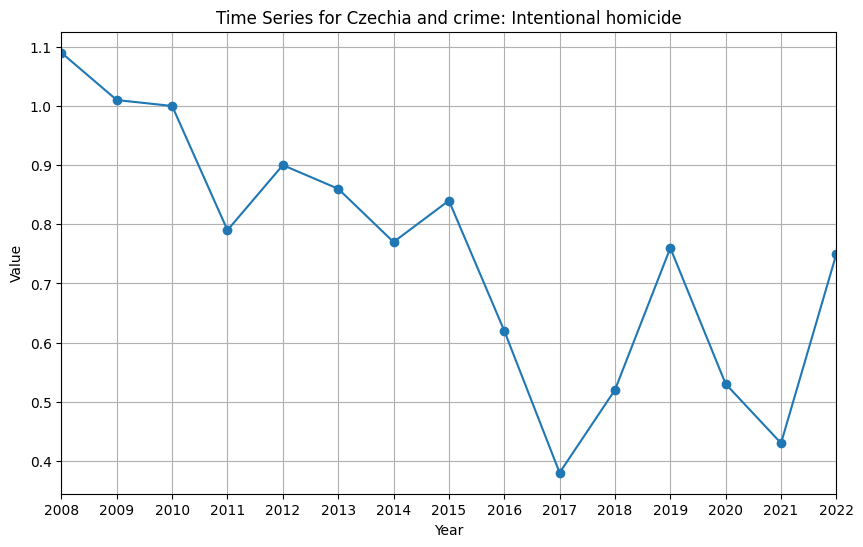

In [19]:
start_year, end_year = years_range.value
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['year'], filtered_data['value'], marker='o')
plt.title(f"Time Series for {country.value} and crime: {crime.value}")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.xlim(start_year, end_year)
plt.xticks(range(start_year, end_year + 1, 1))
plt.show()